In [ ]:
# -----------------------------
# 1) 데이터 준비
# -----------------------------

import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("/content/drive/MyDrive/3-2/MLprogramming/2week/weather.csv")
df  # print(df) 와 동일

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [ ]:
# 결측치 확인
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31


In [ ]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 0 to 365
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           328 non-null    object 
 1   Location       328 non-null    object 
 2   MinTemp        328 non-null    float64
 3   MaxTemp        328 non-null    float64
 4   Rainfall       328 non-null    float64
 5   Evaporation    328 non-null    float64
 6   Sunshine       328 non-null    float64
 7   WindGustDir    328 non-null    object 
 8   WindGustSpeed  328 non-null    float64
 9   WindDir9am     328 non-null    object 
 10  WindDir3pm     328 non-null    object 
 11  WindSpeed9am   328 non-null    float64
 12  WindSpeed3pm   328 non-null    int64  
 13  Humidity9am    328 non-null    int64  
 14  Humidity3pm    328 non-null    int64  
 15  Pressure9am    328 non-null    float64
 16  Pressure3pm    328 non-null    float64
 17  Cloud9am       328 non-null    int64  
 18  Cloud3pm       

In [ ]:

y = df["RainTomorrow"]

X = df.drop(columns=["RainTomorrow", "Location"])


for col in X.columns:
    if X[col].dtype == "object":   # 문자열 타입일 때만 변환
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

# y 라벨 인코딩 (Yes/No → 1/0)
if y.dtype == "object":
    le_y = LabelEncoder()
    y = le_y.fit_transform(y.astype(str))


# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LogisticRegression(max_iter=5000)  # Increased max_iter
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 혼동행렬
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 성능 상세
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[56  0]
 [ 3  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        56
           1       1.00      0.70      0.82        10

    accuracy                           0.95        66
   macro avg       0.97      0.85      0.90        66
weighted avg       0.96      0.95      0.95        66



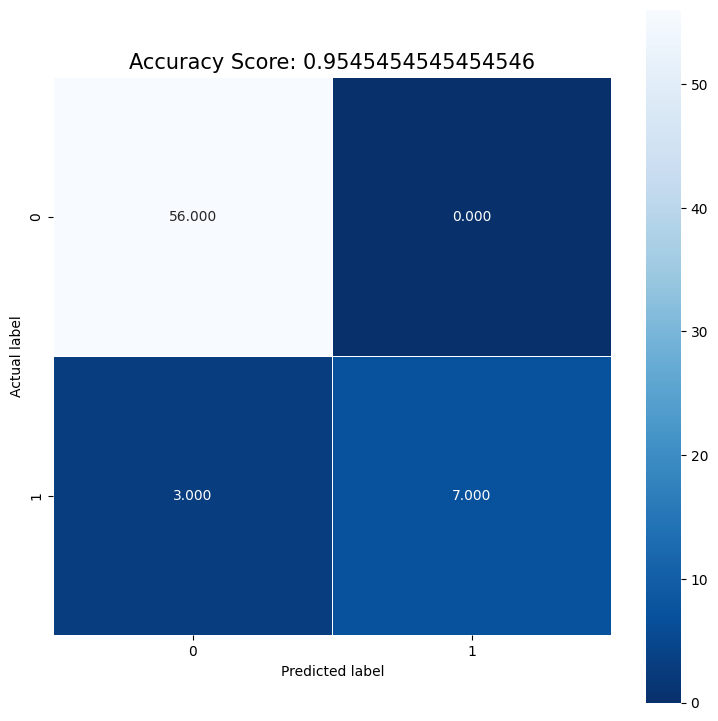

In [ ]:
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show();